In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms

from utils import prepare_cifar10_data, train_model, evaluate_model
from models import VAE, compute_loss_vae

In [2]:
batch_size = 64
learning_rate = 1e-3
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])

In [3]:
train_loader, val_loader, test_loader = prepare_cifar10_data(transform, batch_size)

vae_model = VAE().to(device)
optimizer = optim.Adam(vae_model.parameters(), lr=learning_rate)


trained_model = train_model(
    model=vae_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    compute_loss=compute_loss_vae,
    num_epochs=num_epochs,
    device=device
)

Epoch 1/20
train Loss: 2002.8259
val Loss: 1639.9060
Epoch 2/20
train Loss: 1573.4990
val Loss: 1509.8436
Epoch 3/20
train Loss: 1485.1588
val Loss: 1454.7206
Epoch 4/20
train Loss: 1443.6074
val Loss: 1427.1128
Epoch 5/20
train Loss: 1421.5729
val Loss: 1409.1935
Epoch 6/20
train Loss: 1405.8158
val Loss: 1394.4711
Epoch 7/20
train Loss: 1395.0396
val Loss: 1385.3321
Epoch 8/20
train Loss: 1387.0813
val Loss: 1378.4971
Epoch 9/20
train Loss: 1380.1218
val Loss: 1373.3026
Epoch 10/20
train Loss: 1375.4716
val Loss: 1369.8101
Epoch 11/20
train Loss: 1371.1653
val Loss: 1367.0878
Epoch 12/20
train Loss: 1367.7699
val Loss: 1362.3127
Epoch 13/20
train Loss: 1364.8101
val Loss: 1360.0313
Epoch 14/20
train Loss: 1361.6333
val Loss: 1359.3411
Epoch 15/20
train Loss: 1359.6204
val Loss: 1360.8789
Epoch 16/20
train Loss: 1357.7521
val Loss: 1354.3004
Epoch 17/20
train Loss: 1355.9619
val Loss: 1354.4651
Epoch 18/20
train Loss: 1355.2240
val Loss: 1352.0005
Epoch 19/20
train Loss: 1353.4423
val

In [4]:
test_loss = evaluate_model(
    model=trained_model,
    test_loader=test_loader,
    compute_loss=compute_loss_vae,
    device=device
)

Test Loss: 21.2555


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1770618..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.351526..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7692488..2.3440151].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2933714..1.908451].


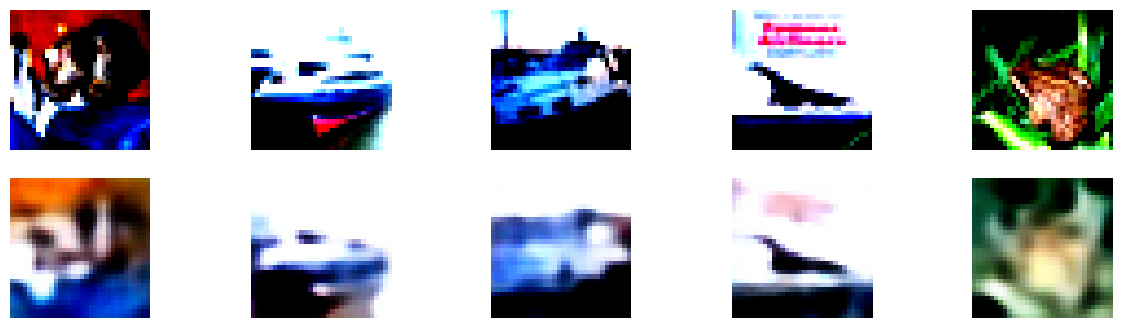

In [15]:
import matplotlib.pyplot as plt 

def show_reconstructed_images(model, test_loader, device, num_images=5):
    model.eval()
    images, _ = next(iter(test_loader))
    images = images.to(device)[:num_images]
    with torch.no_grad():
        outputs, _, _ = model(images)
    images = images.cpu()
    outputs = outputs.cpu()

    fig, axes = plt.subplots(nrows=2, ncols=num_images, sharex=True, sharey=True, figsize=(15, 4))
    for i in range(num_images):
        
        # Original images
        img = images[i]
        img = img.permute(1, 2, 0)
        axes[0, i].imshow(img.numpy())
        axes[0, i].axis('off')
        
        # Reconstructed images
        recon = outputs[i]
        recon = recon * 0.5 + 0.5  # Unnormalize
        recon = recon.permute(1, 2, 0)
        axes[1, i].imshow(recon.numpy())
        axes[1, i].axis('off')
        
    axes[0, 0].set_ylabel('Original')
    axes[1, 0].set_ylabel('Reconstructed')
    plt.show()
    
    
show_reconstructed_images(trained_model, test_loader, device, num_images=5)

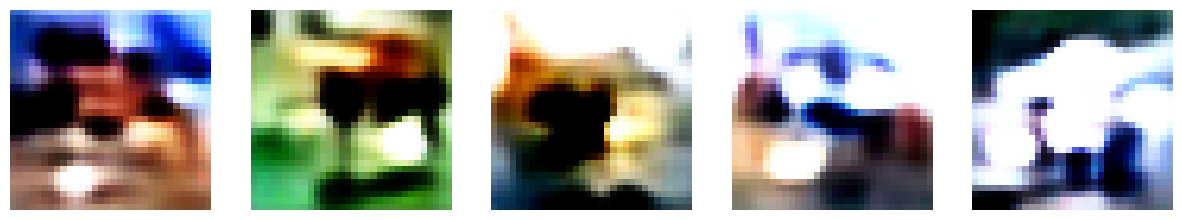

In [105]:
_ = trained_model.generate(device=device)